# Submission Dicoding
## Belajar Machine Learning untuk Pemula

**Arif Dwi Laksito**<br />
arif.laksito@amikom.ac.id

In [1]:
# Import library
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Download dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-10 13:37:11--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.52MB/s    in 50s     

2020-10-10 13:38:02 (6.12 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# Extract dataset
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [14]:
# Split data train and data test
!pip install split-folders
import splitfolders

splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', 
                   output="/tmp/rockpaperscissors/split", seed=1337, ratio=(0.6, 0.4))

Copying files: 2188 files [00:00, 3447.52 files/s]


In [15]:
# Make train directory and validation directory
base_dir = '/tmp/rockpaperscissors/split'
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir, 'val')

In [16]:
# Set Training directory
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

# Set Validation directory
val_rock = os.path.join(val_dir, 'rock')
val_paper = os.path.join(val_dir, 'paper')
val_scissors = os.path.join(val_dir, 'scissors')

In [17]:
# Generate Image
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [19]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 30,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 30,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [23]:
# Setup Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 36992)            

In [24]:
# Multi-Class Cross-Entropy Loss
from keras.optimizers import SGD
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [27]:
callbacks = tf.keras.callbacks.ModelCheckpoint(filepath = 'model.h5', verbose = 1, save_best_only = True)
history = model.fit(
    train_generator,
    steps_per_epoch = 41,
    epochs = 20,
    validation_data = val_generator,
    validation_steps = 27,
    verbose =2,
    callbacks=[callbacks]
)

Epoch 1/20

Epoch 00001: val_loss improved from inf to 0.82610, saving model to model.h5
41/41 - 73s - loss: 1.0102 - accuracy: 0.4869 - val_loss: 0.8261 - val_accuracy: 0.6568
Epoch 2/20

Epoch 00002: val_loss improved from 0.82610 to 0.65077, saving model to model.h5
41/41 - 73s - loss: 0.7388 - accuracy: 0.7128 - val_loss: 0.6508 - val_accuracy: 0.7531
Epoch 3/20

Epoch 00003: val_loss improved from 0.65077 to 0.50152, saving model to model.h5
41/41 - 73s - loss: 0.5009 - accuracy: 0.8175 - val_loss: 0.5015 - val_accuracy: 0.8136
Epoch 4/20

Epoch 00004: val_loss improved from 0.50152 to 0.26669, saving model to model.h5
41/41 - 76s - loss: 0.3241 - accuracy: 0.8903 - val_loss: 0.2667 - val_accuracy: 0.9160
Epoch 5/20

Epoch 00005: val_loss did not improve from 0.26669
41/41 - 72s - loss: 0.2659 - accuracy: 0.9067 - val_loss: 0.6746 - val_accuracy: 0.7407
Epoch 6/20

Epoch 00006: val_loss improved from 0.26669 to 0.25721, saving model to model.h5
41/41 - 72s - loss: 0.3010 - accurac

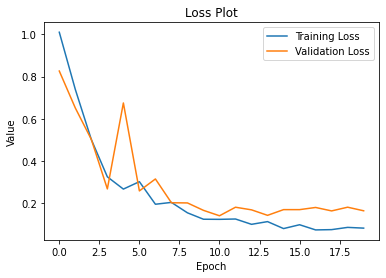

In [28]:
# Loss training and validation
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

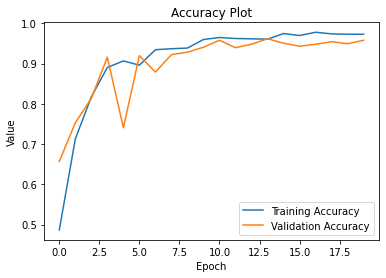

In [29]:
# Accuracy training & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Saving hand-paper.jpg to hand-paper.jpg
hand-paper.jpg
paper


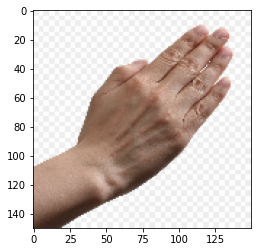

In [33]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')